<a href="https://colab.research.google.com/github/azimhims/azimhims/blob/main/face_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!pip install split-folders

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [63]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

from PIL import Image


In [7]:
root_dir = '/content/drive/MyDrive/family'
import pathlib
data_dir = pathlib.Path(root_dir)
data_dir


PosixPath('/content/drive/MyDrive/family')

In [8]:
list(data_dir.glob('*/*.jpg'))[:10]

[PosixPath('/content/drive/MyDrive/family/2/204.jpg'),
 PosixPath('/content/drive/MyDrive/family/2/205.jpg'),
 PosixPath('/content/drive/MyDrive/family/2/201.jpg'),
 PosixPath('/content/drive/MyDrive/family/2/206.jpg'),
 PosixPath('/content/drive/MyDrive/family/2/207.jpg'),
 PosixPath('/content/drive/MyDrive/family/2/208.jpg'),
 PosixPath('/content/drive/MyDrive/family/2/203.jpg'),
 PosixPath('/content/drive/MyDrive/family/2/202.jpg'),
 PosixPath('/content/drive/MyDrive/family/2/209.jpg'),
 PosixPath('/content/drive/MyDrive/family/2/210.jpg')]

In [9]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

211


In [10]:
aroush = list(data_dir.glob('1/*'))

zainb = list(data_dir.glob('2/*'))
amal = list(data_dir.glob('3/*'))
taha = list(data_dir.glob('4/*'))
mahira = list(data_dir.glob('5/*'))

In [11]:
family_images_dict = {
    'aroush': list(data_dir.glob('1/*')),
    'zainb': list(data_dir.glob('2/*')),
    'amal': list(data_dir.glob('3/*')),
    'taha': list(data_dir.glob('4/*')),
    'mahira': list(data_dir.glob('5/*')),
}

In [10]:
str(family_images_dict['aroush'][0])

'/content/drive/MyDrive/family/family/1/102.jpg'

In [12]:
import cv2
img = cv2.imread(str(family_images_dict['aroush'][4]))
img.shape

(960, 720, 3)

In [15]:
# This step is convert all the images into similar dimension
import os
root_dir = '/content/drive/MyDrive/family'

# Define the desired dimensions
width = 800
height = 600

# Loop through each folder
for folder in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder)

    # Check if it's a folder
    if os.path.isdir(folder_path):
        # Loop through each image in the folder
        for image in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image)

            # Check if it's an image file
            if image_path.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
                # Open the image
                img = Image.open(image_path)

                # Resize the image
                img = img.resize((width, height))

                # Save the resized image
                img.save(image_path)

                print(f"Resized {image_path}")



Resized /content/drive/MyDrive/family/2/204.jpg
Resized /content/drive/MyDrive/family/2/205.jpg
Resized /content/drive/MyDrive/family/2/201.jpg
Resized /content/drive/MyDrive/family/2/206.jpg
Resized /content/drive/MyDrive/family/2/207.jpg
Resized /content/drive/MyDrive/family/2/208.jpg
Resized /content/drive/MyDrive/family/2/203.jpg
Resized /content/drive/MyDrive/family/2/202.jpg
Resized /content/drive/MyDrive/family/2/209.jpg
Resized /content/drive/MyDrive/family/2/210.jpg
Resized /content/drive/MyDrive/family/2/211.jpg
Resized /content/drive/MyDrive/family/2/212.jpg
Resized /content/drive/MyDrive/family/2/213.jpg
Resized /content/drive/MyDrive/family/2/214.jpg
Resized /content/drive/MyDrive/family/2/215.jpg
Resized /content/drive/MyDrive/family/2/216.jpg
Resized /content/drive/MyDrive/family/2/217.jpg
Resized /content/drive/MyDrive/family/2/218.jpg
Resized /content/drive/MyDrive/family/2/220.jpg
Resized /content/drive/MyDrive/family/2/221.jpg
Resized /content/drive/MyDrive/family/2/

In [31]:
import splitfolders
#splitfolders.fixed(root_dir, output="familysample", seed=1337, fixed=(13, 13), oversample=False, group_prefix=None)
splitfolders.ratio(root_dir, output="fam_sample", seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False)

Copying files: 211 files [00:00, 317.60 files/s]


In [33]:
# now time to call imagenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                            horizontal_flip = True,
                            rotation_range = 10 )

In [50]:
dir = '/content/fam_sample/train'
train_generator  = train_datagen.flow_from_directory(
    dir,
    target_size=(180, 180),
    batch_size = 16,
    class_mode = 'sparse'
    )

Found 166 images belonging to 5 classes.


In [41]:
for image_batch, label_batch in train_generator:
  print(image_batch[0])
  break
#image_batch.shape, label_batch.shape

[[[0.7407326  0.7681836  0.7995562 ]
  [0.7372549  0.76470596 0.7960785 ]
  [0.7372549  0.76470596 0.7960785 ]
  ...
  [0.75630885 0.80728924 0.83081865]
  [0.7568078  0.8077882  0.8313176 ]
  [0.7568628  0.8078432  0.8313726 ]]

 [[0.7411765  0.7686275  0.8000001 ]
  [0.7373418  0.7647928  0.79616535]
  [0.7372549  0.76470596 0.7960785 ]
  ...
  [0.7568628  0.8078432  0.8313726 ]
  [0.7568628  0.8078432  0.8313726 ]
  [0.7560388  0.8070192  0.8313726 ]]

 [[0.7411765  0.7686275  0.8000001 ]
  [0.7378407  0.7652917  0.79666424]
  [0.7372549  0.76470596 0.7960785 ]
  ...
  [0.75025487 0.8012353  0.8313726 ]
  [0.74925715 0.80023754 0.8313726 ]
  [0.7493998  0.80038023 0.8317528 ]]

 ...

 [[0.6203682  0.6203682  0.61252505]
  [0.6197266  0.6197266  0.61188346]
  [0.62022555 0.62022555 0.6123824 ]
  ...
  [0.8992745  0.82084316 0.78554904]
  [0.90295357 0.82569367 0.7898138 ]
  [0.8873823  0.8190097  0.7792402 ]]

 [[0.62311745 0.62311745 0.6152743 ]
  [0.62352943 0.62352943 0.6156863 ]


In [51]:
# same do for validation
val = '/content/fam_sample/val'
validation_dataget = ImageDataGenerator(rescale=1./255,
                                        rotation_range = 10,
                                        horizontal_flip = True
                                        )
valid_generator = validation_dataget.flow_from_directory(
    val,
    target_size = (180,180),
    batch_size = 16,
    class_mode = 'sparse'
)

Found 18 images belonging to 5 classes.


In [52]:
test = '/content/fam_sample/test'
validation_dataget = ImageDataGenerator(rescale=1./255,
                                        rotation_range = 10,
                                        horizontal_flip = True
                                        )
test_generator = validation_dataget.flow_from_directory(
    test,
    target_size = (180,180),
    batch_size = 16,
    class_mode = 'sparse'
)

Found 27 images belonging to 5 classes.


In [53]:
# from keras.applications.vgg16 import VGG16
# from keras.applications.resnet50 import ResNet50

In [75]:
input_shape = (180, 180,3)
n_classes = 5


model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(16, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # layers.Conv2D(32,  kernel_size = (3,3), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    # layers.Conv2D(32,  kernel_size = (3,3), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    # layers.Conv2D(32, (3, 3), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    # # layers.Conv2D(32, (3, 3), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    # layers.Conv2D(32, (3, 3), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [76]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 178, 178, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 89, 89, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 126736)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │       4,055,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,056,197 (15.47 MB)

 Trainable params: 4,056,197 (15.47 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
# conv_base = ResNet50(
#     weights='imagenet',
#     include_top = False,
#     input_shape=(180,180,3)
# )

In [55]:
# number_classes = 5

# model = Sequential()
# model.add(conv_base)
# model.add(Flatten())
# model.add(Dense(256,activation='relu'))
# model.add(Dense(number_classes,activation='softmax'))

In [56]:
#conv_base.trainable = False

In [48]:
# scaled_dir = '/content/drive/MyDrive/family/family'
# os.makedirs(scaled_dir, exist_ok=True)

# # Save the scaled images to the new directory
# for i, img in enumerate(X_train_scaled):
#     img_path = os.path.join(scaled_dir, f'img_{i}.jpg')
#     print(img_path)


In [ ]:
# train_ds = keras.utils.image_dataset_from_directory(
#     directory=scaled_dir,
#     labels='inferred',
#     label_mode='int',
#     batch_size=32,
#     image_size=(150,150)
# )
# validation_ds = keras.utils.image_dataset_from_directory(
#     directory = scaled_dir,
#     labels='inferred',
#     label_mode = 'int',
#     batch_size=32,
#     image_size=(150,150)
# )



Found 142 files belonging to 5 classes.
Found 142 files belonging to 5 classes.


In [77]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
#     metrics=['accuracy']
# )

In [83]:
if len(valid_generator) == 0:
    print("Validation generator is empty")
else:
  print(len(valid_generator))

if len(train_generator) == 0:
    print("Train generator is empty")
else:
  print(len(train_generator))


2
11


In [84]:
#history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=3)
#hist = model.fit(steps_per_epoch=10,generator=traindata, validation_data= testdata, validation_steps=10,epochs=5)
history = model.fit(
        train_generator,
        steps_per_epoch=10,
        batch_size=16,
        epochs=5,
        validation_data=valid_generator,
        #validation_steps = len(valid_generator),
        validation_freq=1,
        verbose=1)

# history = model.fit(
#     train_generator,
#     steps_per_epoch=47,
#     batch_size=32,
#     validation_data=validation_generator,
#     validation_steps=6,
#     verbose=1,
#     epochs=20,
# )


Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.2168 - loss: 1.6095 - val_accuracy: 0.2222 - val_loss: 1.6095
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2500 - loss: 1.6083 - val_accuracy: 0.2222 - val_loss: 1.6094
Epoch 3/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.2512 - loss: 1.6089 - val_accuracy: 0.2222 - val_loss: 1.6087
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1667 - loss: 1.6069 - val_accuracy: 0.2222 - val_loss: 1.6087
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.2505 - loss: 1.6082 - val_accuracy: 0.2222 - val_loss: 1.6082


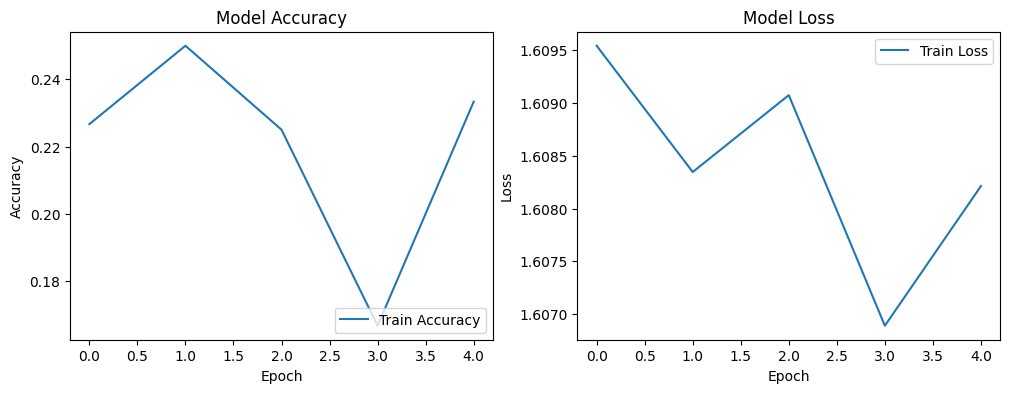

In [85]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
#plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
#plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()


In [ ]:
import cv2

In [88]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the image
img_path = '/content/amal.jpg'  # Update with the path to your image
img = cv2.imread(img_path)

# Preprocess the image
img_resized = cv2.resize(img, (180, 180))  # Resize to the size used during training (150x150)
img_scaled = img_resized / 255.0  # Scale pixel values

# Convert the image to a batch (since the model expects batches of images)
img_array = np.expand_dims(img_scaled, axis=0)  # Shape becomes (1, 150, 150, 3)

# Predict the class
predictions = model.predict(img_array)
print(predictions)

# # Get the class with the highest probability
# predicted_class_index = np.argmax(predictions[0])
# predicted_class_name = list(family_labels_dict.keys())[predicted_class_index]

# Display the result
# print(f"Predicted class: {predicted_class_name}")
# print(f"Prediction probabilities: {predictions[0]}")

# # Optionally, display the image
# plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
# plt.title(f"Predicted: {predicted_class_name}")
# plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0.19768336 0.20224941 0.2013123  0.19820999 0.20054494]]


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [ ]:
conv_base.trainable = False

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/family/family/3',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/family/family/3',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 0 files belonging to 0 classes.


ValueError: No images found in directory /content/drive/MyDrive/family/family/3. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

In [ ]:
data_augmentation = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [ ]:
train_dataset = data_augmentation.flow_from_directory(
    dataset_path,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)



Found 142 images belonging to 5 classes.


In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)



In [ ]:
print(tf.__version__)

2.17.0


In [ ]:
from tensorflow.keras.applications import ConvNext
from tensorflow.keras.layers import Layer, MultiHeadAttention, GlobalAveragePooling2D, Dense


ImportError: cannot import name 'ConvNext' from 'tensorflow.keras.applications' (/usr/local/lib/python3.10/dist-packages/keras/_tf_keras/keras/applications/__init__.py)

In [ ]:
from tensorflow.keras.applications import ConvNeXtLarge
from tensorflow.keras.applications import ConvNext
base_model = ConvNext.ConvNextLarge(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = TransformerEncoder(num_heads=8, ff_dim=128, dropout_rate=0.1)(x)
x = Dense(10, activation='softmax')(x)
model = tf.keras.Model(inputs=base_model.input, outputs=x)




ImportError: cannot import name 'ConvNext' from 'tensorflow.keras.applications' (/usr/local/lib/python3.10/dist-packages/keras/_tf_keras/keras/applications/__init__.py)

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ConvNeXtLarge



In [ ]:
keras.applications.ConvNeXtXLarge(
    include_top=True,
    include_preprocessing=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    name="convnext_xlarge",
)


1401457568/1401457568 ━━━━━━━━━━━━━━━━━━━━ 71s 0us/step


<Functional name=convnext_xlarge, built=True>

In [ ]:
base_model = ConvNeXtLarge(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifie r_activation="softmax",

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False)
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = TransformerEncoder(num_heads=8, ff_dim=128, dropout_rate=0.1)(x)
x = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=base_model.input, outputs=x)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


NameError: name 'TransformerEncoder' is not defined

In [ ]:
print(train_data)

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(64,(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(128,(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(5,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
batch_size = 16
train_steps = train_data.samples // batch_size
valid_steps = valid_data.samples // batch_size

In [ ]:
#batch_size = 32
history = model.fit(train_data,steps_per_epoch= train_steps, epochs=20,validation_data=valid_data, validation_steps=valid_steps)
#history = model.fit(train_generator,steps_per_epoch=train_steps,epochs=5,validation_data = valid_generator,


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.3550 - loss: 13.4882 - val_accuracy: 0.2606 - val_loss: 2.1573
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 772ms/step - accuracy: 0.5833 - loss: 4.9238 - val_accuracy: 0.1197 - val_loss: 2.9260
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 770ms/step - accuracy: 0.6880 - loss: 4.2472 - val_accuracy: 0.3310 - val_loss: 2.7056
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 453ms/step - accuracy: 0.7466 - loss: 3.4168 - val_accuracy: 0.2535 - val_loss: 3.9125
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 614ms/step - accuracy: 0.7956 - loss: 2.5815 - val_accuracy: 0.1831 - val_loss: 7.1222
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 451ms/step - accuracy: 0.7901 - loss: 3.8836 - val_accuracy: 0.1549 - val_loss: 13.1428
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 423ms/step - accuracy: 0.8188 - loss: 2.8758 - val_accuracy: 0.1197 - val_loss: 16.3298
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 520ms/step - accuracy: 0.8504 - loss: 2.2184 - val_accuracy: 0.1056 - val_loss: 19.9712

In [ ]:
from PIL import Image


In [ ]:
data = Image.open("/content/amal.jpg")

In [ ]:
new_image = data.resize((256,256))

In [ ]:
import numpy as np

In [ ]:
new_image_array = np.array(new_image)

In [ ]:
new_image_array = new_image_array/255.0

In [ ]:
new_image_array = np.expand_dims(new_image_array, axis=0)

# Transpose the array to match the expected input shape (None, 256, 256, 3)
new_image_array = np.transpose(new_image_array, (0, 2, 1, 3))

# Now you can feed the image into the model



In [ ]:

prediction = model.predict(new_image_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


In [ ]:
print(prediction)

[[6.8271656e-20 7.0605186e-25 1.3111503e-04 0.0000000e+00 9.9986887e-01]]
